In [1]:
import matplotlib.pyplot as plt
import numpy as np
from imp import reload

In [2]:
import os.path
import gzip
import pickle
import os
import urllib.request
from PIL import Image
from mnist_load import load_mnist
#%run mnist_load.py

In [18]:
def img_show(img):
    pil_img = Image.fromarray(np.float64(img))
    pil_img.show()
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False, normalize=False)
img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)
img_show(img)

5
(1, 28, 28)
(28, 28)


In [4]:
def test_print(string):
    print(string)
def call_func(func):
    func("Test")
call_func(test_print)

Test


In [186]:
import model
import train
from model import Model
from train import Train
from common.util import shuffle_dataset


In [187]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

In [188]:
#reload(model)
#reload(train)
print(x_train.shape)
x_train = x_train[:1000]
t_train = t_train[:1000]
print(x_train.shape)
max_epochs = 20
epocs=200
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
weight_init_std = 0.01

validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

(60000, 784)
(1000, 784)


In [189]:
print(x_train.shape)
model = Model(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std,activation='Relu', weight_decay_lambda=0.1,
                 use_weight_init_std=True, use_dropout = False, dropout_ratio = 0.5, use_batchnorm=False)
train = Train(model, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': learning_rate}, verbose=False)

(800, 784)


In [190]:
train.train()

In [191]:
train_acc, test_acc = train.train_accuracy_list, train.test_accuracy_list
len(train_acc)

229

In [178]:
train.max_iter

160

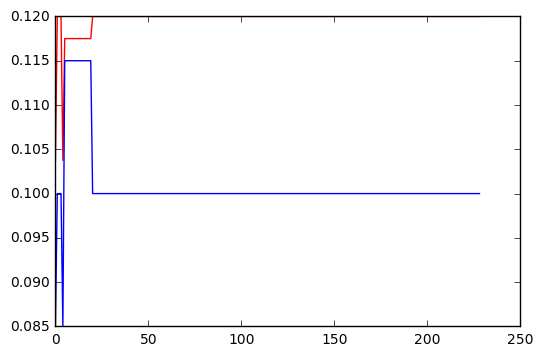

In [192]:
iter_list = np.arange(len(train_acc))
plt.figure(1)
plt.plot(iter_list, train_acc,'r')
plt.plot(iter_list, test_acc,'b')
plt.show()